In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
project_path = '/content/drive/My Drive/AIML/PROJECT/'

In [5]:
import h5py

# Open the file as readonly
h5f = h5py.File(project_path + 'SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Close this file
h5f.close()

In [6]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


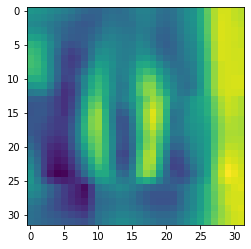

Label:  0


In [8]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[100])    
plt.show()
print('Label: ', y_train[100])


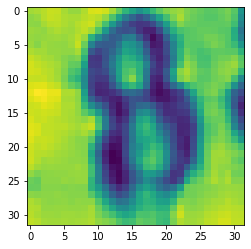

Label:  8


In [9]:
plt.imshow(X_test[10])    # show first number in the dataset
plt.show()
print('Label: ', y_test[10])

In [10]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape(42000,1024)
print(X_train.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


In [11]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test/ 255.0

In [12]:
# converting y data into categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (1024, )))

In [17]:
#Add 1st hidden layer
model.add(Dense(200, activation='relu'))
#Add 2nd hidden layer
model.add(Dense(100, activation='relu'))
#Add 3rd hidden layer
model.add(Dense(60, activation='relu'))
#Add 4th hidden layer
model.add(Dense(30, activation='relu'))
#Add OUTPUT layer
model.add(Dense(10, activation='softmax'))

In [18]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [19]:
history = model.fit(X_train, y_train, batch_size = 100, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
420/420 [==============================] - 5s 11ms/step - loss: 2.2956 - accuracy: 0.1213 - val_loss: 2.2831 - val_accuracy: 0.1726
Epoch 2/10
420/420 [==============================] - 5s 11ms/step - loss: 2.2651 - accuracy: 0.1883 - val_loss: 2.2375 - val_accuracy: 0.2536
Epoch 3/10
420/420 [==============================] - 5s 11ms/step - loss: 2.1919 - accuracy: 0.2633 - val_loss: 2.1180 - val_accuracy: 0.3101
Epoch 4/10
420/420 [==============================] - 5s 11ms/step - loss: 2.0268 - accuracy: 0.3160 - val_loss: 1.9482 - val_accuracy: 0.2999
Epoch 5/10
420/420 [==============================] - 5s 11ms/step - loss: 1.8326 - accuracy: 0.3728 - val_loss: 1.7111 - val_accuracy: 0.4072
Epoch 6/10
420/420 [==============================] - 5s 11ms/step - loss: 1.6365 - accuracy: 0.4474 - val_loss: 1.4896 - val_accuracy: 0.5006
Epoch 7/10
420/420 [==============================] - 5s 12ms/step - loss: 1.5120 - accuracy: 0.4939 - val_loss: 1.6498 - val_accuracy: 0.4312

In [20]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 3ms/step - loss: 1.2043 - accuracy: 0.6170


In [21]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6169999837875366


In [ ]:
#  By using 'sgd' optimizer Training accuracy is 57.22 after 10 epochs and test accuracy is 61.7.

In [37]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (1024, )))

#Add 1st hidden layer
model.add(Dense(200, activation='relu'))
#Add 2nd hidden layer
model.add(Dense(100, activation='relu'))
#Add 3rd hidden layer
model.add(Dense(60, activation='relu'))
#Add 4th hidden layer
model.add(Dense(30, activation='relu'))
#Add OUTPUT layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history = model.fit(X_train, y_train, batch_size = 100, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
420/420 [==============================] - 5s 13ms/step - loss: 2.3042 - accuracy: 0.1018 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 2/10
420/420 [==============================] - 5s 12ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 3/10
420/420 [==============================] - 5s 12ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 4/10
420/420 [==============================] - 5s 12ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 5/10
420/420 [==============================] - 5s 12ms/step - loss: 2.3027 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 6/10
420/420 [==============================] - 5s 13ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 7/10
420/420 [==============================] - 5s 12ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3027 - val_accuracy: 0.0955

In [23]:
# Adding Batch normalizing and dropout.

from tensorflow.keras.layers import BatchNormalization, Dropout

def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
  
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [24]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 100, epochs =20, verbose = 1)

Epoch 1/20
420/420 [==============================] - 2s 4ms/step - loss: 2.3238 - accuracy: 0.1590
Epoch 2/20
420/420 [==============================] - 2s 4ms/step - loss: 1.8605 - accuracy: 0.3272
Epoch 3/20
420/420 [==============================] - 2s 4ms/step - loss: 1.6128 - accuracy: 0.4334
Epoch 4/20
420/420 [==============================] - 2s 4ms/step - loss: 1.4879 - accuracy: 0.4924
Epoch 5/20
420/420 [==============================] - 2s 4ms/step - loss: 1.4075 - accuracy: 0.5255
Epoch 6/20
420/420 [==============================] - 2s 4ms/step - loss: 1.3365 - accuracy: 0.5574
Epoch 7/20
420/420 [==============================] - 2s 4ms/step - loss: 1.2775 - accuracy: 0.5794
Epoch 8/20
420/420 [==============================] - 2s 4ms/step - loss: 1.2416 - accuracy: 0.5966
Epoch 9/20
420/420 [==============================] - 2s 4ms/step - loss: 1.2059 - accuracy: 0.6092
Epoch 10/20
420/420 [==============================] - 2s 4ms/step - loss: 1.1676 - accuracy: 0.6242

In [25]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 1ms/step - loss: 0.9252 - accuracy: 0.7114


In [26]:
print('Test accuracy: ', results[1])

Test accuracy:  0.711388885974884


In [ ]:
# Training accuracy is 67.7 after 20 epochs and testing accuracy is 71.1
# By using 'sgd' optimizer accuracy is 61.7 
# By using 'adam' optimizer accuracy raised to 71.1

In [27]:
from tensorflow.keras.layers import BatchNormalization, Dropout


def mlp_model():
    model = Sequential()
    
    model.add(Dense(1000, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.3))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [28]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 100, epochs =20, verbose = 1)

Epoch 1/20
420/420 [==============================] - 12s 28ms/step - loss: 1.9931 - accuracy: 0.2959
Epoch 2/20
420/420 [==============================] - 12s 28ms/step - loss: 1.3700 - accuracy: 0.5477
Epoch 3/20
420/420 [==============================] - 12s 28ms/step - loss: 1.1585 - accuracy: 0.6324
Epoch 4/20
420/420 [==============================] - 12s 28ms/step - loss: 1.0380 - accuracy: 0.6753
Epoch 5/20
420/420 [==============================] - 12s 28ms/step - loss: 0.9525 - accuracy: 0.7029
Epoch 6/20
420/420 [==============================] - 12s 28ms/step - loss: 0.8838 - accuracy: 0.7277
Epoch 7/20
420/420 [==============================] - 12s 28ms/step - loss: 0.8460 - accuracy: 0.7415
Epoch 8/20
420/420 [==============================] - 12s 28ms/step - loss: 0.8047 - accuracy: 0.7515
Epoch 9/20
420/420 [==============================] - 12s 28ms/step - loss: 0.7715 - accuracy: 0.7597
Epoch 10/20
420/420 [==============================] - 12s 28ms/step - loss: 0.740

In [29]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 3s 5ms/step - loss: 0.7833 - accuracy: 0.7546


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7545555830001831


In [ ]:
# By using 'adam' optimizer with learning rate 0.001, batch size= 100, epochs =20, training accuracy raised to 81.7
# Testing accuracy is raised to 75.46

In [31]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 32, epochs =25, verbose = 1)

Epoch 1/25
1313/1313 [==============================] - 21s 16ms/step - loss: 1.9593 - accuracy: 0.3033
Epoch 2/25
1313/1313 [==============================] - 21s 16ms/step - loss: 1.4483 - accuracy: 0.5172
Epoch 3/25
1313/1313 [==============================] - 21s 16ms/step - loss: 1.2710 - accuracy: 0.5947
Epoch 4/25
1313/1313 [==============================] - 21s 16ms/step - loss: 1.1450 - accuracy: 0.6387
Epoch 5/25
1313/1313 [==============================] - 21s 16ms/step - loss: 1.0642 - accuracy: 0.6678
Epoch 6/25
1313/1313 [==============================] - 21s 16ms/step - loss: 0.9971 - accuracy: 0.6920
Epoch 7/25
1313/1313 [==============================] - 21s 16ms/step - loss: 0.9536 - accuracy: 0.7037
Epoch 8/25
1313/1313 [==============================] - 21s 16ms/step - loss: 0.9181 - accuracy: 0.7145
Epoch 9/25
1313/1313 [==============================] - 21s 16ms/step - loss: 0.8830 - accuracy: 0.7263
Epoch 10/25
1313/1313 [==============================] - 21s 16m

In [32]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 3s 5ms/step - loss: 0.8485 - accuracy: 0.7307


In [33]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7306666374206543


In [ ]:
# By using 'adam' optimizer with learning rate 0.001, batch size= 32, epochs =20, training accuracy reduced to 79.38
# Testing accuracy is reduced to 73.07

In [34]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 100, epochs =50, verbose = 1)

Epoch 1/50
420/420 [==============================] - 12s 28ms/step - loss: 2.0392 - accuracy: 0.2851
Epoch 2/50
420/420 [==============================] - 12s 28ms/step - loss: 1.3925 - accuracy: 0.5448
Epoch 3/50
420/420 [==============================] - 12s 28ms/step - loss: 1.1651 - accuracy: 0.6305
Epoch 4/50
420/420 [==============================] - 12s 29ms/step - loss: 1.0446 - accuracy: 0.6725
Epoch 5/50
420/420 [==============================] - 12s 28ms/step - loss: 0.9604 - accuracy: 0.7023
Epoch 6/50
420/420 [==============================] - 12s 28ms/step - loss: 0.8965 - accuracy: 0.7234
Epoch 7/50
420/420 [==============================] - 12s 29ms/step - loss: 0.8560 - accuracy: 0.7371
Epoch 8/50
420/420 [==============================] - 12s 29ms/step - loss: 0.8144 - accuracy: 0.7469
Epoch 9/50
420/420 [==============================] - 12s 29ms/step - loss: 0.7774 - accuracy: 0.7628
Epoch 10/50
420/420 [==============================] - 12s 29ms/step - loss: 0.740

In [35]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 3s 5ms/step - loss: 0.6841 - accuracy: 0.7906


In [36]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7905555367469788


In [ ]:
# By using 'adam' optimizer with learning rate 0.001, batch size= 100, epochs =50, training accuracy raised to 87.43
# Testing accuracy is raised to 79.06